In [1]:
from IPython.display import HTML

HTML('''<script> 
code_show=true;
function code_toggle() { 
  if (code_show){
    $('div.input').hide();
    $('div.prompt').hide();
  } 
  else { 
    $('div.prompt').show();
    $('div.input').show();
    } code_show = !code_show ;
    
}

$( document ).ready(code_toggle);
</script>
<style>
input {
    width : 100%;
    background-color: white;
    border: none;
    color: white;
    padding: 1px 1px;
    margin: 1px 1px;
    cursor: pointer;
}
</style>

<form action="javascript:code_toggle()">
  <input type="submit" value="">
</form>''')

# 2017 Plan
- Reinforcement Learning 
 - 
- Paper Reading
- Personal AI project ( investment )
- Data Scientist Blog Refine 

# Measurement

- $ \text{EPS (Earnings Per Share) }  = \frac{ \text{Net Income - Divdends on Preferred Stock }}{\text{Average Outstanding Shares}} $ 

- $ \text{P/E ratio} = \frac{\text{Price Per Share ( Stock Price )}}{\text{EPS}} $ 

# Operation Detail 

- 何時持股，才有股息股利？ : 前一天
- 股票手續費
 - Buy  :: 0.1425% 
 - Sell :: 0.1425 + 0.3)%
 - **All :: 0.6% **

In [ ]:
from yahoo_finance import Share
import pandas as pd
import datetime

def getStock(id):
    stock = Share(str(id)+'.TW')
    today = datetime.date.today()
    data = stock.get_historical('2016-12-01', str(today))
    return data


In [ ]:
data = getStock(2002)
df = pd.DataFrame(data)
df.describe()

In [ ]:
df.ix[:5,:]

In [ ]:
df['High'] = df['High'].astype(float)
df['Low']  = df['Low'].astype(float)
df['Close']= df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df.describe()

In [29]:

html = """
<div id="main" style="width:600px;height:400px;"></div>

<script>   

//
require.config({
         paths:{
            echarts: ['//cdn.bootcss.com/echarts/3.4.0/echarts.min'],
         }
    });

//
require(['echarts'],function(ec){
  //
  var myChart = ec.init(document.getElementById('main'));

  //
  var option = {
            title: {
                text: 'Kent'
            },
            tooltip: {},
            legend: {
                data:['销量']
            },
            xAxis: {
                data: ["衬衫","羊毛衫","雪纺衫","裤子","高跟鞋","袜子"]
            },
            yAxis: {},
            series: [{
                name: '销量',
                type: 'bar',
                data: [5, 20, 36, 10, 10, 20]
            }]
        };

  //  
  myChart.setOption(option);
         });
    </script>
"""

In [31]:
from IPython.display import HTML
HTML(html)

In [23]:

from IPython.display import display

from ipywidgets import interact, interactive, fixed
from ipywidgets import widgets, IntSlider

def f(i):
    load = 1000000
    i = str(i)
    pay_per_mon = {'7':13209, '5':17964, '3':29077}
    try:
        all_paid= pay_per_mon[i] * int(i) * 12
        extra_paid = all_paid - load 
        print extra_paid
        avg_earn_rate_peryer = round((72/float(extra_paid)*100),5)
        print ('{} %'.format(avg_earn_rate_peryer,))
    except:
        print ('Do not have this value')
    
interact(f,i=5)



77840
0.0925 %


<function __main__.f>

# Recurrent Neural Network 

In [42]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

# set random seed for comparing the two result calculations
tf.set_random_seed(1)

# this is data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# hyperparameters
lr = 0.001
training_iters = 100000
batch_size = 128

n_inputs = 28   # MNIST data input (img shape: 28*28)
n_steps = 28    # time steps
n_hidden_units = 128   # neurons in hidden layer
n_classes = 10      # MNIST classes (0-9 digits)

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

# Define weights
weights = {
    # (28, 128)
    'in': tf.Variable(tf.random_normal([n_inputs, n_hidden_units])),
    # (128, 10)
    'out': tf.Variable(tf.random_normal([n_hidden_units, n_classes]))
}
biases = {
    # (128, )
    'in': tf.Variable(tf.constant(0.1, shape=[n_hidden_units, ])),
    # (10, )
    'out': tf.Variable(tf.constant(0.1, shape=[n_classes, ]))
}



Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


IOError: [Errno socket error] [Errno 8] nodename nor servname provided, or not known

In [ ]:

def RNN(X, weights, biases):
    # hidden layer for input to cell
    ########################################

    # transpose the inputs shape from
    # X ==> (128 batch * 28 steps, 28 inputs)
    X = tf.reshape(X, [-1, n_inputs])

    # into hidden
    # X_in = (128 batch * 28 steps, 128 hidden)
    X_in = tf.matmul(X, weights['in']) + biases['in']
    # X_in ==> (128 batch, 28 steps, 128 hidden)
    X_in = tf.reshape(X_in, [-1, n_steps, n_hidden_units])

    # cell
    ##########################################

    # basic LSTM Cell.
    lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(n_hidden_units, forget_bias=1.0, state_is_tuple=True)
    # lstm cell is divided into two parts (c_state, h_state)
    init_state = lstm_cell.zero_state(batch_size, dtype=tf.float32)

    # You have 2 options for following step.
    # 1: tf.nn.rnn(cell, inputs);
    # 2: tf.nn.dynamic_rnn(cell, inputs).
    # If use option 1, you have to modified the shape of X_in, go and check out this:
    # https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/3_NeuralNetworks/recurrent_network.py
    # In here, we go for option 2.
    # dynamic_rnn receive Tensor (batch, steps, inputs) or (steps, batch, inputs) as X_in.
    # Make sure the time_major is changed accordingly.
    outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, X_in, initial_state=init_state, time_major=False)

    # hidden layer for output as the final results
    #############################################
    # results = tf.matmul(final_state[1], weights['out']) + biases['out']

    # # or
    # unpack to list [(batch, outputs)..] * steps
    outputs = tf.unpack(tf.transpose(outputs, [1, 0, 2]))    # states is the last outputs
    results = tf.matmul(outputs[-1], weights['out']) + biases['out']

    return results

In [ ]:


pred = RNN(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
train_op = tf.train.AdamOptimizer(lr).minimize(cost)

correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

with tf.Session() as sess:
    # tf.initialize_all_variables() no long valid from
    # 2017-03-02 if using tensorflow >= 0.12
    if int((tf.__version__).split('.')[1]) < 12:
        init = tf.initialize_all_variables()
    else:
        init = tf.global_variables_initializer()
    sess.run(init)
    step = 0
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape([batch_size, n_steps, n_inputs])
        sess.run([train_op], feed_dict={
            x: batch_xs,
            y: batch_ys,
        })
        if step % 20 == 0:
            print(sess.run(accuracy, feed_dict={
            x: batch_xs,
            y: batch_ys,
        }))
        step += 1

In [43]:
def weight_variable(shape):
  """generate matrix by shape"""
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  """generate matrix by shape"""
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

In [49]:
a = weight_variable([3,3])
b = bias_variable([3,1])
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print a.eval()
    print b.eval()
  

[[ 0.02602299 -0.05459989 -0.16906485]
 [ 0.06459884  0.05261028  0.03466164]
 [-0.06080087 -0.04672744 -0.01919708]]
[[ 0.1]
 [ 0.1]
 [ 0.1]]


# RNN Example

### Using tf.SequenceExample to prepare Data in Protocol Buff
- RNNs are used for sequential data that has inputs and/or outputs at multiple time steps.

### Batching and Padding
### Dynamic RNN
### Bidirectional Dynamic RNN
### RNN Cells and Cell Wrappers
### Masking the Loss


In [50]:
import tensorflow as tf
import numpy as np
import tempfile

In [51]:
# input data with batch = 3 
# input data with step = 3 and 2 
# input data with dim = ?
sequences = [[1, 2, 3], [4, 5, 1], [1, 2]]

label_sequences = [[0, 1, 0], [1, 0, 0], [1, 1]]

def make_example(sequence, labels):
    # The object we return
    ex = tf.train.SequenceExample()
    # A non-sequential feature of our example
    sequence_length = len(sequence)
    ex.context.feature["length"].int64_list.value.append(sequence_length)
    # Feature lists for the two sequential features of our example
    fl_tokens = ex.feature_lists.feature_list["tokens"]
    fl_labels = ex.feature_lists.feature_list["labels"]
    for token, label in zip(sequence, labels):
        fl_tokens.feature.add().int64_list.value.append(token)
        fl_labels.feature.add().int64_list.value.append(label)
    return ex

# Write all examples into a TFRecords file
with tempfile.NamedTemporaryFile() as fp:
    writer = tf.python_io.TFRecordWriter(fp.name)
    for sequence, label_sequence in zip(sequences, label_sequences):
        ex = make_example(sequence, label_sequence)
        writer.write(ex.SerializeToString())
    writer.close()
    print("Wrote to {}".format(fp.name))

Wrote to /var/folders/8n/02mlsh7j2n78nqwmbkyvlq680000gn/T/tmpYBV4KS


In [52]:
tf.reset_default_graph()

# A single serialized example
# (You can read this from a file using TFRecordReader)
ex = make_example([1, 2, 3], [0, 1, 0]).SerializeToString()

# Define how to parse the example
context_features = {
    "length": tf.FixedLenFeature([], dtype=tf.int64)
}
sequence_features = {
    "tokens": tf.FixedLenSequenceFeature([], dtype=tf.int64),
    "labels": tf.FixedLenSequenceFeature([], dtype=tf.int64)
}

# Parse the example (returns a dictionary of tensors)
context_parsed, sequence_parsed = tf.parse_single_sequence_example(
    serialized=ex,
    context_features=context_features,
    sequence_features=sequence_features
)

context = tf.contrib.learn.run_n(context_parsed, n=1, feed_dict=None)
print(context[0])
sequence = tf.contrib.learn.run_n(sequence_parsed, n=1, feed_dict=None)
print(sequence[0])

{'length': 3}
{'tokens': array([1, 2, 3]), 'labels': array([0, 1, 0])}


莫凡RNN

In [55]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

BATCH_START = 0
TIME_STEPS = 20
BATCH_SIZE = 50
INPUT_SIZE = 1
OUTPUT_SIZE = 1
CELL_SIZE = 10
LR = 0.006


def get_batch():
    global BATCH_START, TIME_STEPS
    # xs shape (50batch, 20steps)
    xs = np.arange(BATCH_START, BATCH_START+TIME_STEPS*BATCH_SIZE).reshape((BATCH_SIZE, TIME_STEPS)) / (10*np.pi)
    seq = np.sin(xs)
    res = np.cos(xs)
    BATCH_START += TIME_STEPS
    plt.plot(xs[0, :], res[0, :], 'r', xs[0, :], seq[0, :], 'b--')
    plt.show()
    # returned seq, res and xs: shape (batch, step, input)
    return [seq[:, :, np.newaxis], res[:, :, np.newaxis], xs]

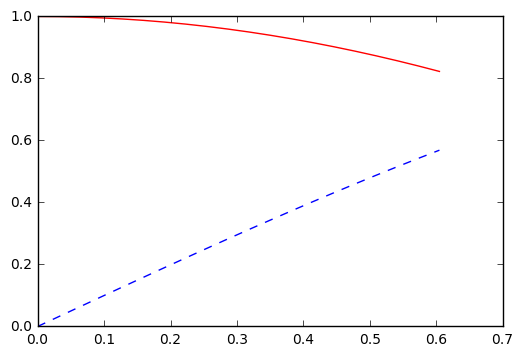

[array([[[ 0.        ],
         [ 0.03182561],
         [ 0.06361898],
         [ 0.0953479 ],
         [ 0.12698022],
         [ 0.15848389],
         [ 0.18982699],
         [ 0.22097778],
         [ 0.25190469],
         [ 0.28257638],
         [ 0.3129618 ],
         [ 0.34303014],
         [ 0.37275095],
         [ 0.40209411],
         [ 0.43102991],
         [ 0.45952901],
         [ 0.48756255],
         [ 0.51510214],
         [ 0.54211986],
         [ 0.56858834]],
 
        [[ 0.59448077],
         [ 0.61977092],
         [ 0.64443316],
         [ 0.6684425 ],
         [ 0.69177464],
         [ 0.71440591],
         [ 0.73631341],
         [ 0.75747492],
         [ 0.77786902],
         [ 0.79747503],
         [ 0.81627311],
         [ 0.8342442 ],
         [ 0.85137009],
         [ 0.86763343],
         [ 0.88301776],
         [ 0.89750747],
         [ 0.9110879 ],
         [ 0.92374528],
         [ 0.93546679],
         [ 0.94624055]],
 
        [[ 0.95605566],
         [

In [56]:
get_batch()